One of the reasons that the Python language is extremely popular is that it makes writing programs easy. Because Python is a high-level language, we don't have to worry about things like allocating memory on our computer or choosing how certain operations are done by our computer's processor. In contrast, when we use low-level languages like C, we define exactly how memory will be managed and how the processor will execute our instructions. This means that coding in a low-level language takes longer; however, we have more ability to optimize our code to run faster.

In this file, we'll learn the fundamentals of **NumPy**. NumPy stands for **Numerical Python** and is a Python package that can be used for numerical computing. Numpy is at the center of most Python libraries for data science and machine learning.

Computer can allocate memory in two ways. It can either allocate a single location or a contiguous range of memory locations. A contiguous range of memory locations is called an **array**. Following are the properties of arrays:

1. An array is a fixed length that cannot be modified
2. We can access any index of an array in constant time *O(1)*

We used lists of lists to represent data sets. While lists of lists are sufficient for working with small data sets, they aren't very good for working with larger data sets. The NumPy library solves this problem.

In [4]:
lolst = [[1,2],[0,1],[2,1],[1,1]]

sums = []
for i in lolst:
    add = i[0] + i[1]
    sums.append(add)
sums
    

[3, 1, 3, 2]

In each iteration of our loop, the Python interpreter turns our code into bytecode, and the bytecode asks our computer's processor to add the two numbers together

Our computer would take four processor cycles to process the four rows of our data.

The NumPy library takes advantage of a processor feature called **Single Instruction Multiple Data (SIMD)** to process data faster. SIMD allows a processor to perform the same operation, on multiple data points, in a single processor cycle

NumPy is implemented in a low-level programming language called **C**. A low-level programming language provides less abstraction from a computer's processor instructions. This means that there are fewer steps involved in translating a program into something that a computer's processor can execute. The consequence is code that runs much faster.

This concept of replacing for loops with operations applied to multiple data points at once is called **vectorization**.

The core data structure in NumPy that makes vectorization possible is the **ndarray or n-dimensional array**. In programming, array describes a collection of elements, similar to a list. We can think of an ndarray as a list with a fixed length, that is, a list without the `list.append()` method.The word **n-dimensional** refers to the fact that ndarrays can have one or more dimensions.

We can directly convert a list into an ndarray with the same values using the `numpy.array()` constructor. To create an ndarray from a list, we can pass that list as an argument:

In [1]:
import numpy as np

data_ndarray = np.array([10, 20, 30])
print(data_ndarray.dtype)
data_ndarray

int32


array([10, 20, 30])

We'll analyze taxi trip data released by the city of New York.

Approximately 90,000 yellow taxi trips to and from New York City airports between January and June 2016. Below is information about selected columns from the data set:

* `pickup_year`: The year of the trip.
* `pickup_month`: The month of the trip (January is 1, December is 12).
* `pickup_day`: The day of the month of the trip.
* `pickup_location_code`: The airport or borough where the trip started.
* `dropoff_location_code`: The airport or borough where the trip finished.
* `trip_distance`: The distance of the trip in miles.
* `trip_length`: The length of the trip in seconds.
* `fare_amount`: The base fare of the trip, in dollars.
* `total_amount`: The total amount charged to the passenger, including all fees, tolls and tips.

In [3]:
from csv import reader

data = list(reader(open("nyc_taxis.csv")))

data = data[1:]

converted_list = []

for i in data:
    lst = []
    for item in i:
        lst.append(float(item))
    converted_list.append(lst)

        

In [12]:
import numpy as np

# Method 1
# taxi = np.array(data, dtype = np.float64)
# taxi.astype("float64")

# Method 2
taxi = np.array(converted_list)
print(taxi.dtype)

# Method 3
# taxi = np.genfromtxt("nyc_taxis.csv", skip_header = True, delimiter = ",")
# print(taxi.dtype) 

The elipses (...) between rows and columns indicate that there is more data in our NumPy ndarray than can easily be printed.

When we can't easily print the entire ndarray, we can use the `ndarray.shape` attribute instead

The data type returned is called a **tuple**. Tuples are very similar to Python lists, but can't be modified.

The output gives us a few important pieces of information:

* The first number tells us that there are rows in `data_ndarray`.
* The second number tells us that there are columns in `data_ndarray`.

In [13]:
taxi_shape = taxi.shape
taxi_shape

(89560, 15)

In [14]:
row_0 = taxi[0] # Select the row at index 0
rows_391_to_500 = taxi[391:501] # Select every column for the rows at indexes 391 to 500 inclusive
row_21_column_5 = taxi[21,5] # Select the item at row index 21 and column index 5

In [15]:
columns_1_4_7 = taxi[:,[1,4,7]] # Select every row for the columns at indexes 1, 4, and 7
row_99_columns_5_to_8 = taxi[99,5:9] # Select the columns at indexes 5 to 8 inclusive for the row at index 99
rows_100_to_200_column_14 = taxi[100:201,14] # Select the rows at indexes 100 to 200 inclusive for the column at index 14

We can provide a third parameter when slicing an ndarray. This is the **slicing increment** or **step** parameter. It determines how much indexes are incremented when taking elements in a slice. The general syntax for slicing is the following:

`x[start:end:step]`

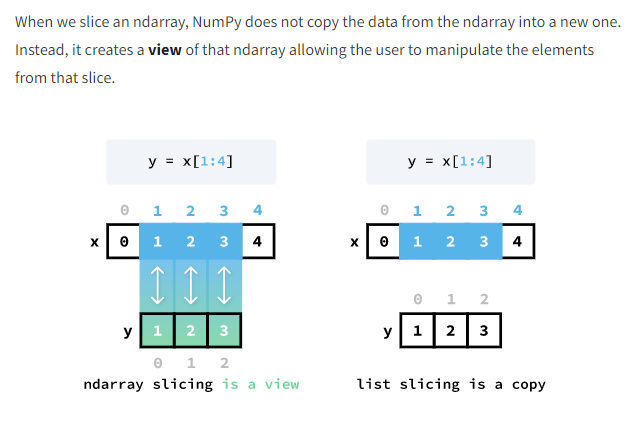

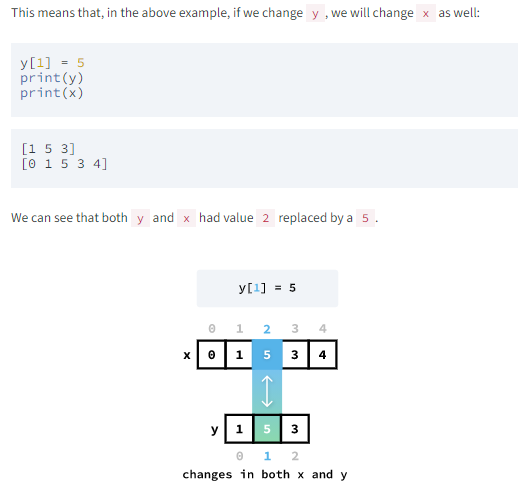

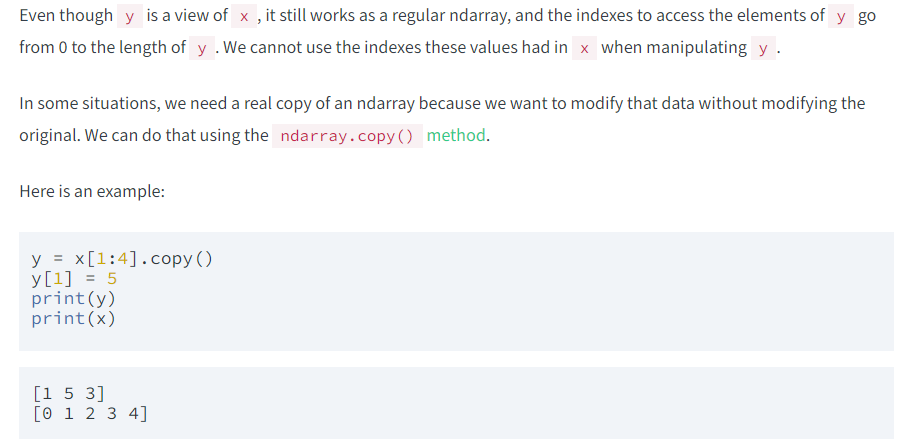

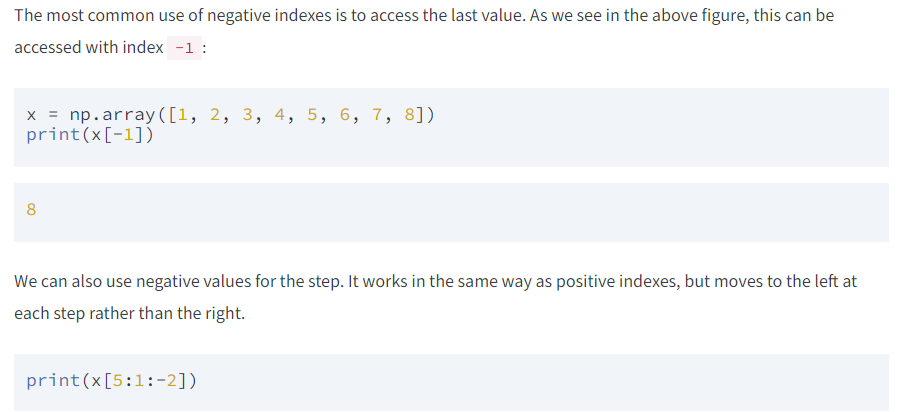

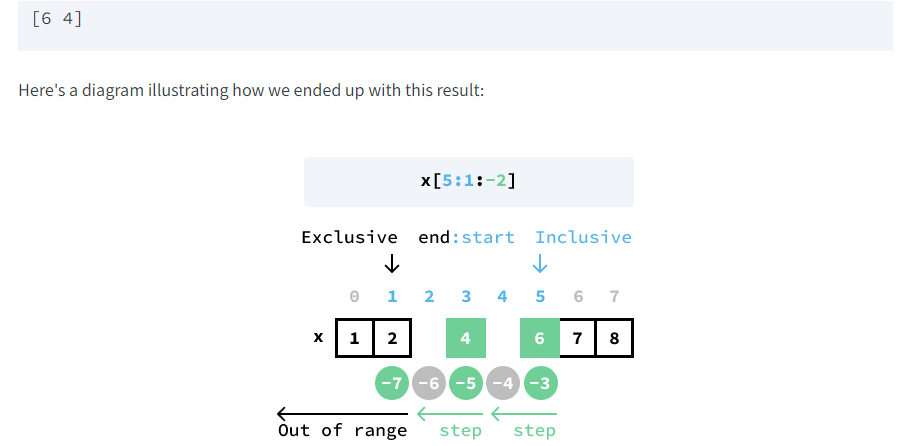

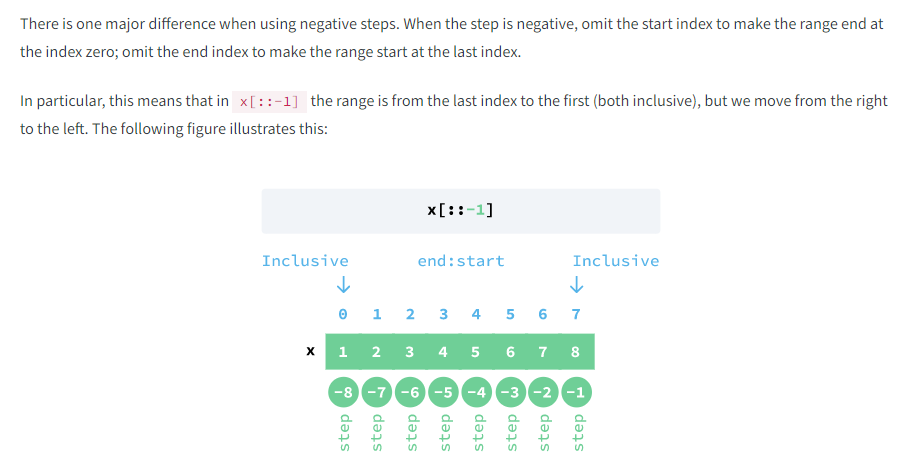

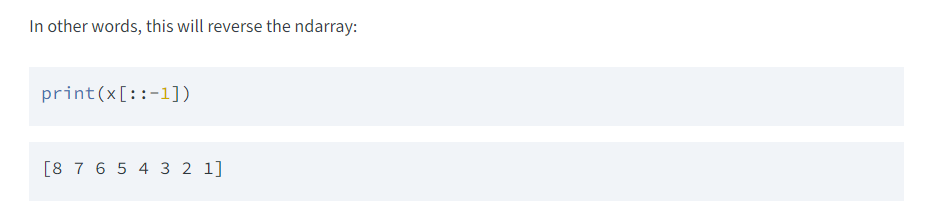

In [16]:
fare_and_fees = taxi[:,9] + taxi[:,10] # add two columns

The result of adding two 1D ndarrays is a 1D ndarray of the same shape (or dimensions) as the original. In this context, ndarrays can also be called **vectors**, a term taken from a branch of mathematics called **linear algebra**. What we just did, adding two vectors together, is called **vector addition**.

 We can actually use any of the standard Python numeric operators with vectors, including:

* vector_a + vector_b - Addition
* vector_a - vector_b - Subtraction
* vector_a * vector_b - Multiplication (this is unrelated to the vector multiplication used in linear algebra).
* vector_a / vector_b - Division

When we perform these operations on two 1D vectors, both vectors must have the same shape.

In [17]:
# Calculate the miles per hour

trip_distance_miles = taxi[:,7]
trip_length_seconds = taxi[:,8]
trip_mph = trip_distance_miles/(trip_length_seconds/3600) # # 3600 seconds in one hour

Numpy ndarrays have methods for many different calculations. A few key methods are:

* `ndarray.min()` to calculate the minimum value
* `ndarray.max()` to calculate the maximum value
* `ndarray.mean()` to calculate the mean or average value
* `ndarray.sum()` to calculate the sum of the values

We could use the Python built-in function `min()` and `max()`. These work but will be much slower than using the corresponding functions provided by NumPy.

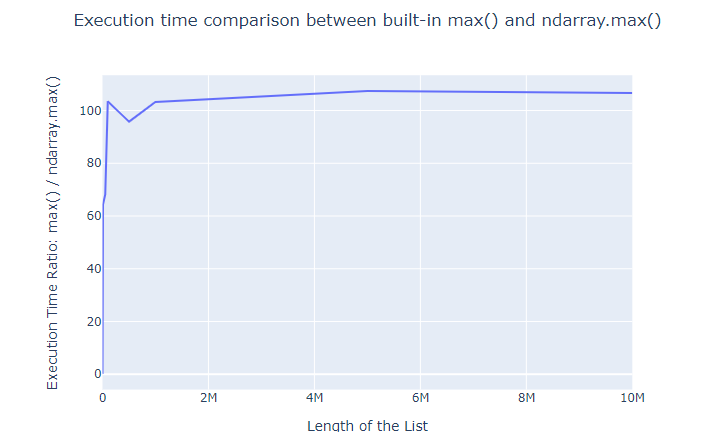

In [21]:
mph_max = trip_mph.max() 
mph_mean = trip_mph.mean()
mph_min = trip_mph.min() 

print(round(mph_max,ndigits =2))
print(round(mph_mean,ndigits =2))
print(round(mph_min,ndigits =2))

82800.0
32.24
0.0


A trip speed of 82,000 mph is definitely not possible in New York traffic - that's almost 20x faster than the fastest plane in the world! This could be due to an error in the devices that records the data, or perhaps errors made somewhere in the data pipeline

# Review the difference between methods and functions. 

Functions act as stand alone segments of code that usually take an input, perform some processing, and return some output. For example, we can use the `len()` function to calculate the length of a list or the number of characters in a string.

In contrast, methods are special functions that belong to a specific type of object. This means that, for instance, when we work with list objects, there are special functions or methods that can only be used with lists. For example, we can use the `list.append()` method to add an item to the end of a list. If we try to use that method on a string, we will get an error:

In NumPy, sometimes there are operations that are implemented as both methods and functions, which can be confusing.

To remember the right terminology, anything that starts with np (e.g. np.mean()) is a function and anything expressed with an object (or variable) name first (e.g. `trip_mph.mean()`) is a method. When both exist, it's up to us to decide which to use, but it's much more common to use the method approach.

We'll calculate statistics for 2D ndarrays. If we use the `ndarray.max()` method on a 2D ndarray without any additional parameters, it will return a single value, just like with a 1D array:

But what if we wanted to find the maximum value of each row? We'd need to use the axis parameter and specify a value of 1 to indicate we want to calculate the maximum value for each row.

If we want to find the maximum value of each column, we'd use an axis value of 0:

If the axis is not given, NumPy will calculate the maximum over all entries of the 2-dimensional array.

In [22]:
taxi_first_five = taxi[:5] # first five rows 
fare_components = taxi[:5,9:13] # select these columns: fare_amount, fees_amount, tolls_amount, tip_amount

fare_sums = fare_components.sum(axis = 1)
fare_totals = taxi_first_five[:,13]

# compare the summed columns to the fare_totals
print(fare_sums)
print(fare_totals)


[69.99 54.3  37.8  32.76 18.8 ]
[69.99 54.3  37.8  32.76 18.8 ]


In [8]:
x = np.array([[1, 1, 1, 1, 1] for _ in range(5)])
x

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [9]:
x[::2,::2] = 0
print(x)

[[0 1 0 1 0]
 [1 1 1 1 1]
 [0 1 0 1 0]
 [1 1 1 1 1]
 [0 1 0 1 0]]


In [17]:
import time
import random
random.seed(0)

# Generate test lists
list1 = [random.randint(0, 1000) for _ in range(1000000)]
list2 = [random.randint(0, 1000) for _ in range(1000000)]

def add_list_values(list1, list2):
    result = []
    N = len(list1)
    for i in range(N):
        result.append(list1[i] + list2[i])
    return result

# Measure the execution time of adding lists
start = time.time()
add_list_values(list1, list2)
end = time.time()
time_list = end - start

# Create ndarrays from the lists
x1 = np.array(list1)
x2 = np.array(list2)

# Measure the execution time of adding ndarrays
start = time.time()
x3 = x1 + x2
end = time.time()
time_array = end - start

# Compute the execution time ratio
ratio = time_list / time_array
print(ratio)

96.8304226023723


Adding values using ndarrays is about 97 times faster than using a for loop on lists.

### Broadcasting

In NumPy we can perform arithmetic operations between ndarrays and numeric values. This feature is called **broadcasting**. Broadcasting is a mechanism that makes it possible to do calculations between ndarrays that have different shapes.

A mental model of what broadcasting is doing, is that it tries to match the shapes of two ndarrays that we are trying to operate. It does so by stretching them until their shapes match.

Note that this is just a helpful mental model. In reality, NumPy does not create this extended version of the ndarray in memory. Doing so would slow down the execution time and use unnecessary memory.

The way to think about how NumPy decides what to add where, is to imagine that it expands the smaller ndarray with copies of itself until both have the same shape. Here is a figure representing this:

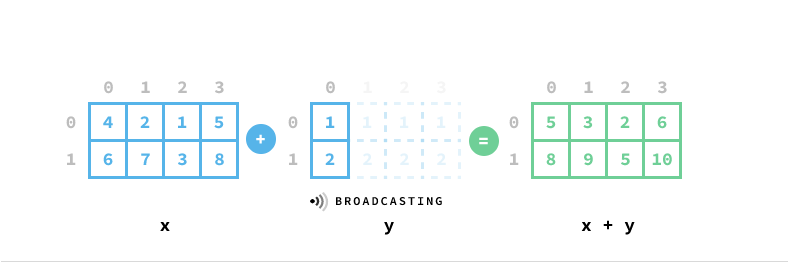

Broadcasting also works in the vertical direction.

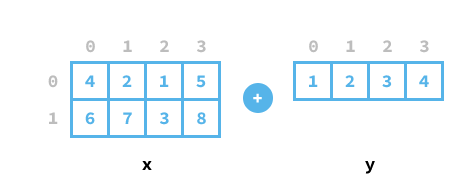

In some cases, operations can involve broadcasting both ndarrays. What do we think will be the result of the following addition?

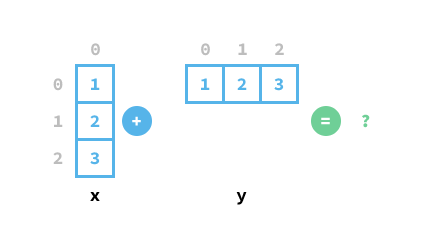

`x = np.array([
    [1],
    [2],
    [3]
])`

`y = np.array([1, 2, 3])`

`z = x + y`

Both had three elements, but one was horizontal, while the other was vertical. Here is what we got:

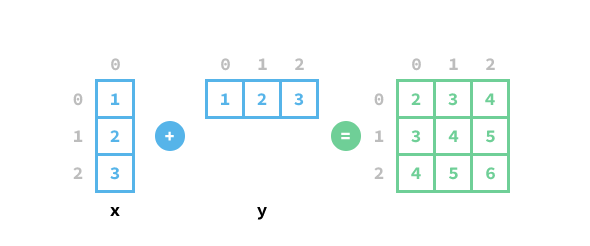

By looking at the result, it might not be self-evident what happened. Here is a figure explaining how the result was calculated:

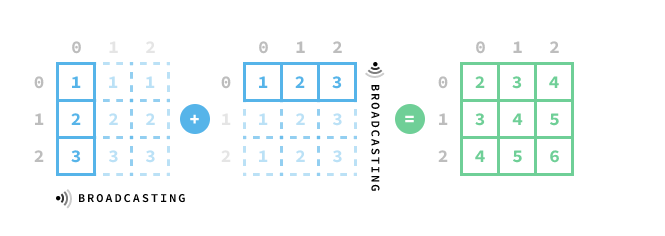

We can see that both ndarrays were broadcasted.This strategy works as long as both ndarrays have the same number of elements. 

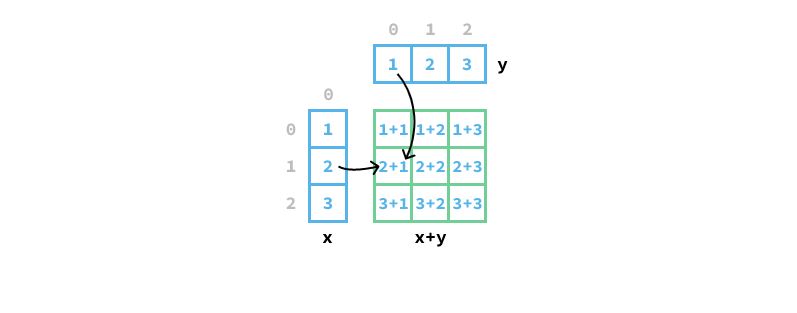

Imagine that we throw two six-sided dices and add the two results together. Below we used broadcasting to create a 2-dimensional array that contains all possible outcomes.


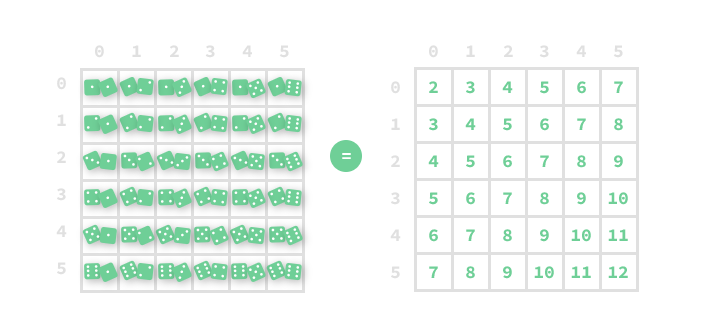

Broadcasting is not always possible. We'll learn the general rules that NumPy applies to try to make two ndarrays the same shape.

Here is an example where broadcasting does not work:

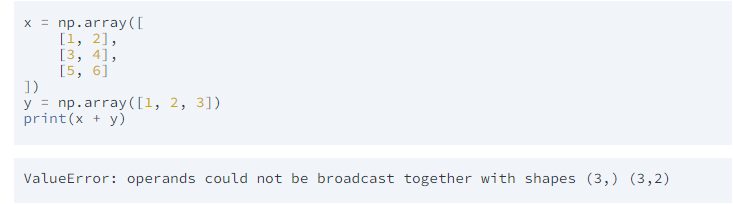

Let's go over the steps that NumPy uses to try to match the dimensions of two ndarrays. We will apply each step to the shapes `(3,)` and `(3, 2)`.

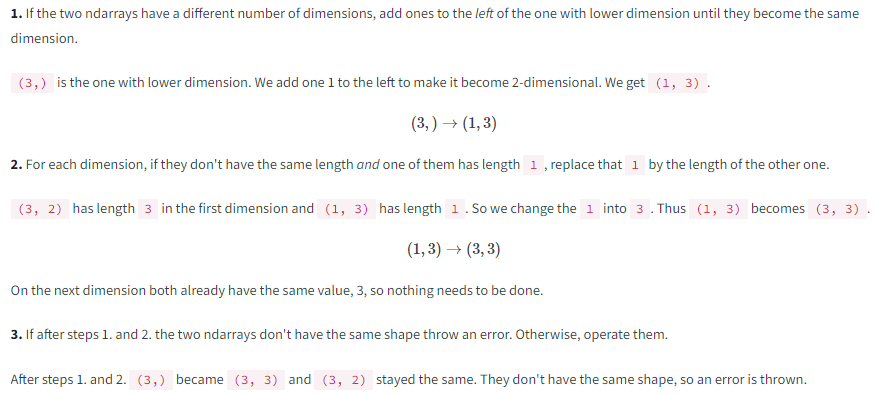

In [18]:
x = np.array([1, 2, 3, 4])

y = np.array([
    [1], 
    [2], 
    [3], 
    [4]
])

shape_x = x.shape
shape_y = y.shape

print(shape_x, shape_y)

(4,) (4, 1)


In [19]:
# Step 1.
# Add 1's to the left of shape of x until it becomes 2-dimensional
shape_x_step1 = (1, 4)
shape_y_step1 = (4, 1)

# Step 2.
# We got a 1 and a 4 in the first position. Make the 1 into a 4.
shape_x_step2 = (4, 4)

# We got a 1 and a 4 in the second position. Make the 1 into a 4.
shape_y_step2 = (4, 4)

# Step 3.
# Both have the same shape, so they can be added.
error = False

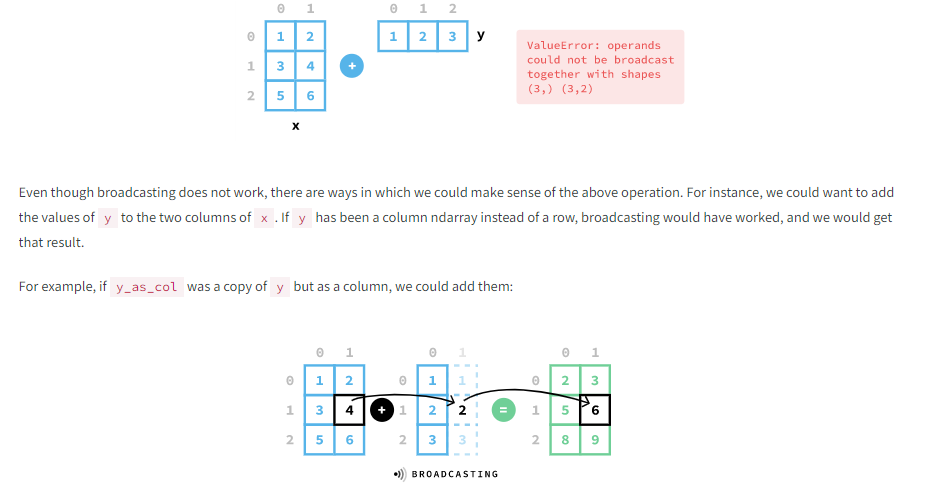

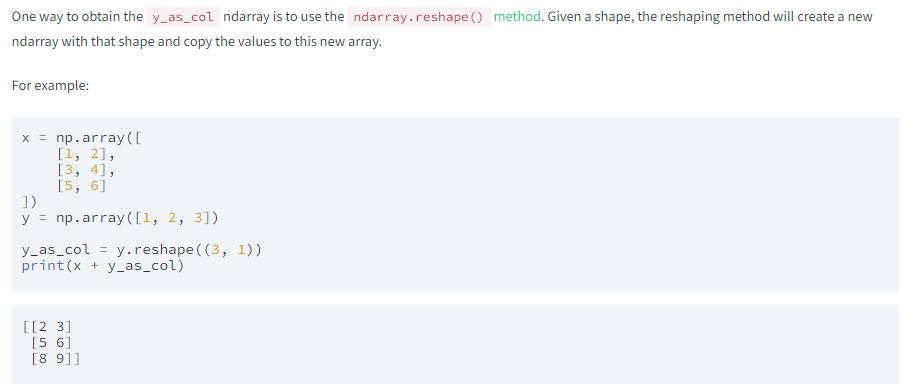

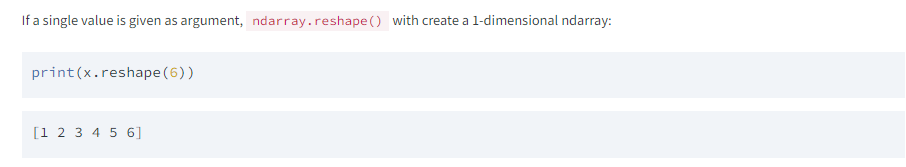

In [20]:
a = np.array([i for i in range(1, 7)])
b = a.reshape((6, 1))
sums = a+b
sums

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12]])

We can reshape an ndarray by providing the new shape. However, we cannot reshape an ndarray into any shape.

The only condition that the reshape method requires is for the new shape to hold the same number of values as the original ndarray. The number of values that a shape can hold is equal to the product of all shape values.

For example, shape `(3, 5)` can hold 3 × 5 = 15 values. The shape `(5, 1)` can hold 5 × 1 = 5 values.

In [23]:
from IPython.display import Image

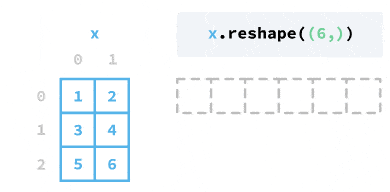

In [24]:
# Example 1:

Image("9.1-m508-min.gif")

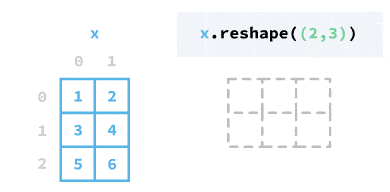

In [25]:
# Example 2:

Image("9.2-m508-min.gif")

We can also use a column by column order by setting the `order` parameter to `'F'`. The letter F comes from the **Fortran programming language**, which uses a **column first order** when indexing 2D arrays.

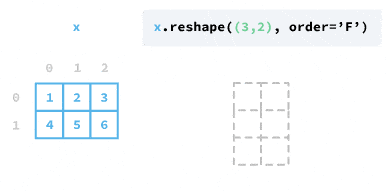

In [26]:
Image("9.3-m508-min.gif")

In [27]:
cell_numbers = np.array([i for i in range(1, 37)])
numbering_by_row = cell_numbers.reshape((6, 6))
numbering_by_col = cell_numbers.reshape((6, 6), order='F')

We learned:

* About broadcasting and how it enables us to perform calculations between ndarrays of different shapes.
* The conditions upon which broadcasting works.
* How to reshape ndarrays.